Note: I am Using Scipy v1.1.0. In case of any errors you can install scipy 1.1.0 by the following command:
pip install scipy==1.1.0

In [26]:
import scipy
scipy.__version__

'1.1.0'

To download images Click on this url: https://drive.google.com/drive/folders/1pcaTwofZGfoCxZ3Hv2X6vW6xf_1i88eb?usp=sharing

# Import Libraries

In [71]:
from skimage import data
from scipy.misc import imread, imresize
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Power Law Transformation

Formula of Power Law Transformation is:
s =c*r^gamma

# Original Image

In [183]:
original_image =imread('sydney.png',True, 'L')    #read image as grey scale image

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


# Processed Image

In [184]:
processed_img =original_image.copy()

In [185]:
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
    
  #read image as grey scale image
    
# Define parameters. 
r1 = 130
s1 = 10
r2 = 140
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 
  
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(processed_img, r1, s1, r2, s2)
processed_img=contrast_stretched

In [186]:
processed_img[processed_img<0]=0
processed_img[processed_img>=255]=255

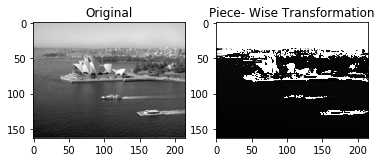

In [187]:
fig, axes = plt.subplots(1, 2)
ax = axes.ravel()

ax[0].imshow(original_image,cmap=plt.cm.gray,interpolation='bilinear')
ax[0].set_title("Original")
ax[1].imshow(processed_img, cmap=plt.cm.gray,interpolation='bilinear')

ax[1].set_title("Piece- Wise Transformation")
plt.imshow(processed_img,cmap=plt.cm.gray) 

# Demo of Array

In [188]:
print(original_image[1:5,1:5])
print(processed_img[1:5,1:5])

[[189. 191. 190. 191.]
 [189. 190. 191. 192.]
 [191. 191. 192. 192.]
 [192. 192. 193. 193.]]
[[255. 255. 255. 255.]
 [255. 255. 255. 255.]
 [255. 255. 255. 255.]
 [255. 255. 255. 255.]]
